In [58]:
########### PACKAGES #############

import torch
import torchvision 
import torch.nn as nn
import matplotlib.pyplot as plt

In [59]:
########### Creating Datasets ###########
transform = torchvision.transforms.Compose( [ torchvision.transforms.ToTensor()])
mnist_data = torchvision.datasets.MNIST( root = './MNIST_DATA' , download = True , train = True  , transform = transform )
train_dataset, val_dataset = torch.utils.data.random_split(mnist_data, [48000, 12000])
test_dataset = torchvision.datasets.MNIST ( "./MNIST_DATA" , train = False , transform = transform  , download = True)
val_loader = torch.utils.data.DataLoader( val_dataset) 
test_loader = torch.utils.data.DataLoader(  test_dataset ) 
training_batch_size = 128

In [60]:
print(f"The number of training examples are {len(train_dataset)}")
print(f"The Number of validation examples are {len(val_dataset)}")
print(f"The number of testing examples are {len(test_dataset)}")

The number of training examples are 48000
The Number of validation examples are 12000
The number of testing examples are 10000


In [61]:
print(f"Shape of x: {mnist_data[0][0].shape}")
print(f"Shape 0f y: {mnist_data[0][1]} (scalor)" )

Shape of x: torch.Size([1, 28, 28])
Shape 0f y: 5 (scalor)


In [62]:
dataloader = torch.utils.data.DataLoader( dataset = mnist_data , batch_size = training_batch_size ) 

In [63]:
print(dataloader)

In [64]:
for i,(X,Y) in enumerate( dataloader) : 
    print(X.shape, Y.shape )
    break

torch.Size([128, 1, 28, 28]) torch.Size([128])


In [107]:

class FeedForwardNN( nn.Module) : 
    
    def __init__( self  , n_layers , n_sizes  , activation = 'relu') : 
        
        super( FeedForwardNN , self ).__init__()
        self.n_layers = n_layers
        self.n_sizes = n_sizes 
        self.layers = nn.ModuleList()
        self.layers.append( nn.Linear( 28*28, n_sizes[0]))
        for i in range (n_layers-1) : 
            self.layers.append(nn.Linear( n_sizes[i] , n_sizes[i+1]) )
        self.layers.append(nn.Linear( n_sizes[n_layers-1]  , 10 ) )
        if activation == 'relu' : 
            self.activation = nn.ReLU()
        elif activation == 'sigmoid' : 
            self.activation = nn.Sigmoid()
      
    def forward(self , images  ) :
        
        x = images.view( -1 , 28*28 ) 
        for i in range(self.n_layers)  : 
            x = self.activation(self.layers[i](x))
        x  = self.layers[self.n_layers](x)
        return x 
        

In [146]:
n_nodes = 30
lr = 1
model = FeedForwardNN( n_layers = 2 , n_sizes = [n_nodes ,n_nodes] , activation = 'relu')
params = model.parameters()
lossFn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params , lr = lr )
loss_list  = [] 
n_epochs = 3
for epoch in range(n_epochs+1) : 
    for i , ( X , Y ) in enumerate(dataloader) : 
        X = torch.autograd.Variable(X)
        Y = torch.autograd.Variable(Y)
        output = model(X)
        optimizer.zero_grad()
        loss = lossFn( output , Y )
        loss.backward()
        optimizer.step()
        loss_list.append(loss)

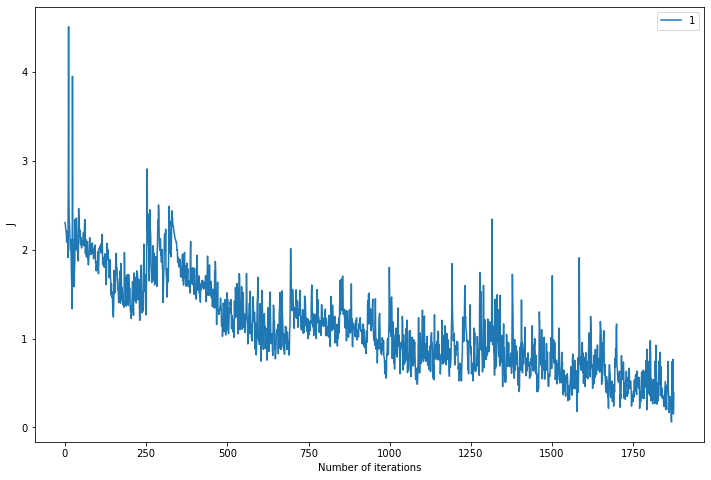

In [147]:
plt.figure( figsize = (12,8))
plt.plot( [ t.item() for t in loss_list ]   , label = f"{lr}")
# plt.plot( [ t.item() for t in loss_relu] , label = 'relu)
plt.ylabel("J")
plt.xlabel("Number of iterations")
plt.legend()

plt.savefig(f"Learning  rate {lr}.png")

In [87]:
model(mnist_data[1][0].view(-1,28*28)).argmax(  ) #### COMMAND FOR PREDICTION 

tensor(0)

In [88]:
mnist_data[1][1] #### COMMAND FOR ACTUAL LABEL

0

In [148]:

correct = 0 
total = 0 
for i , (X , Y ) in enumerate(val_loader) : 
    with torch.no_grad(): 
        output = model(X)
        pred = torch.argmax( output ).item()
#         print(pred , Y.item() , pred ==  Y.item() )
        if( pred == Y.item() ) : 
            correct += 1
        total += 1

In [149]:
print( f"The accuracy of the model on the validation dataset is {correct/total*100}" )

The accuracy of the model on the validation dataset is 88.18333333333334


In [150]:
correct = 0 
total = 0 
train_loader = torch.utils.data.DataLoader( train_dataset) 
for i , (X , Y ) in enumerate(train_loader) : 
    with torch.no_grad(): 
        output = model(X)
        pred = torch.argmax( output ).item()
#         print(pred , Y.item() , pred ==  Y.item() )
        if( pred == Y.item() ) : 
            correct += 1
        total += 1
print( f"The accuracy of the model on the training dataset is {correct/total*100}" )

The accuracy of the model on the training dataset is 88.27916666666667
